In [320]:
%load_ext autoreload
%autoreload 2
%run nnn/ipynb_init.py
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import os, json
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import warnings
warnings.filterwarnings("ignore")
from nnn.uv import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


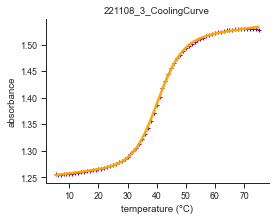

In [122]:
# for debugging
# datadir="./data/uv_melt/ECLExport"
# data_list = [fn for fn in absolute_file_paths(datadir) if fn.endswith('.csv')]
# result_dict = fit_curve(data_list[10], 
#                         figdir=os.path.join(datadir, 'fig'), debug=True)

100%|█████████████████████████████████████████| 192/192 [00:51<00:00,  3.73it/s]


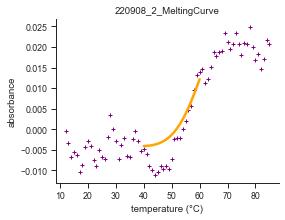

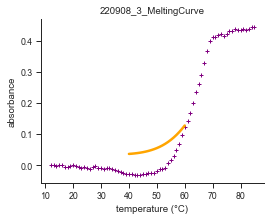

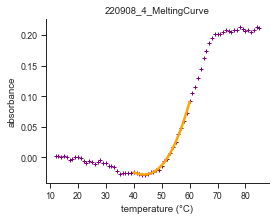

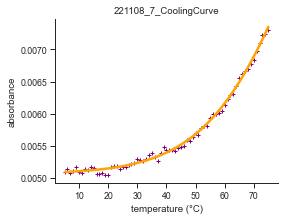

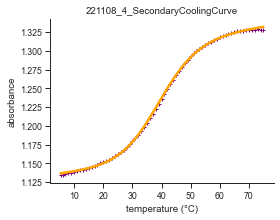

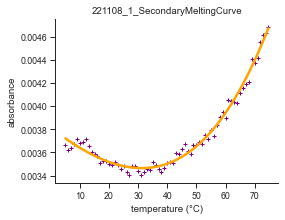

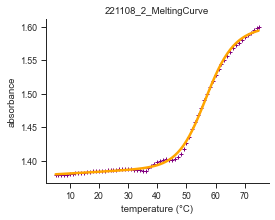

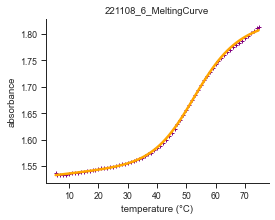

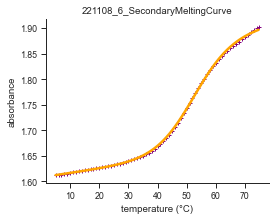

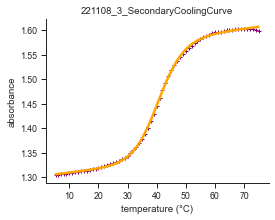

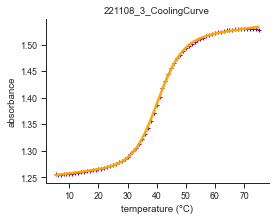

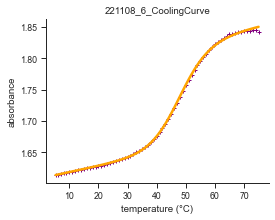

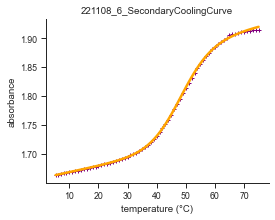

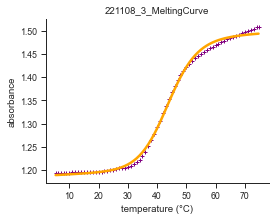

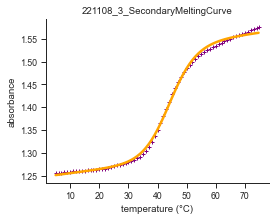

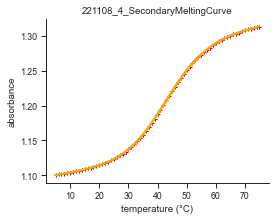

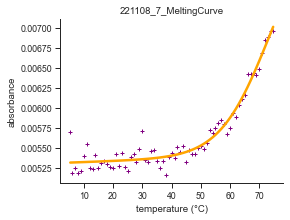

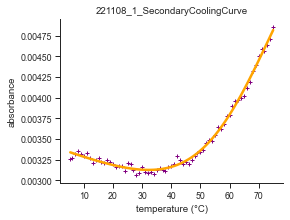

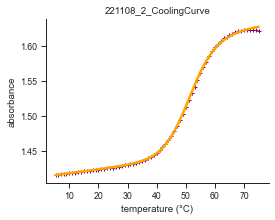

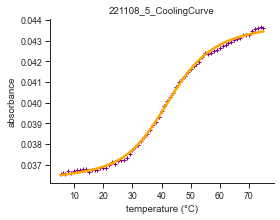

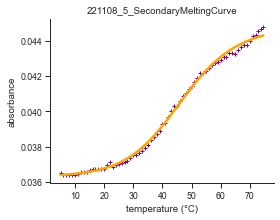

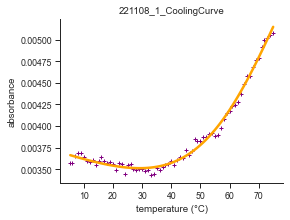

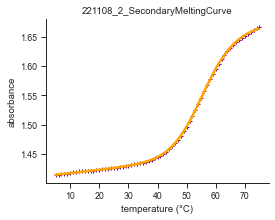

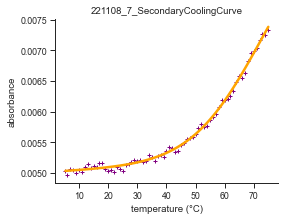

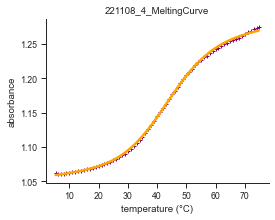

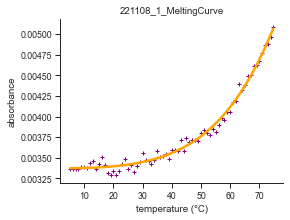

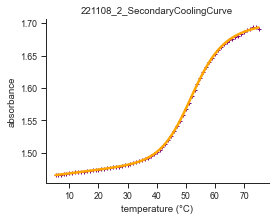

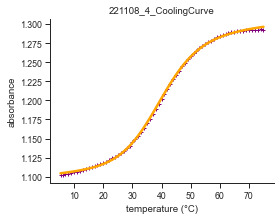

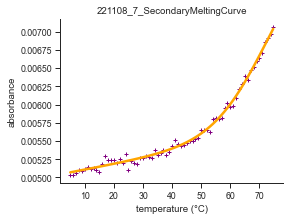

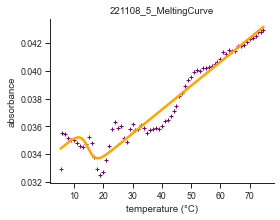

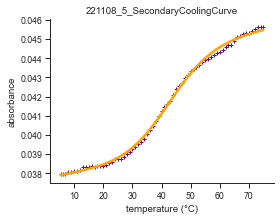

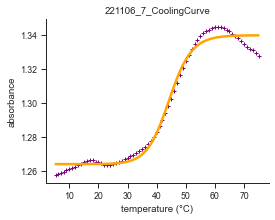

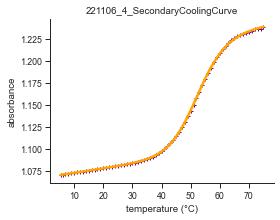

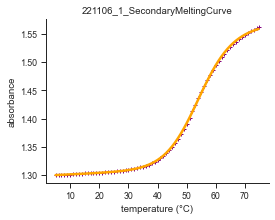

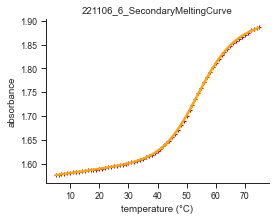

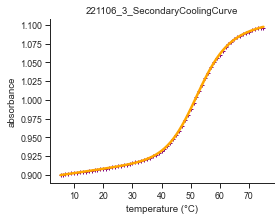

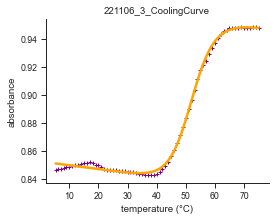

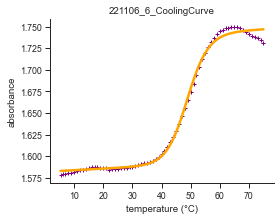

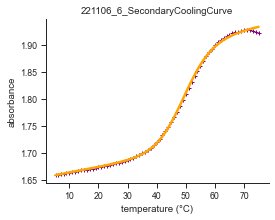

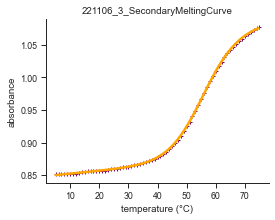

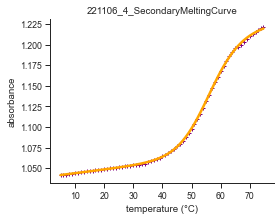

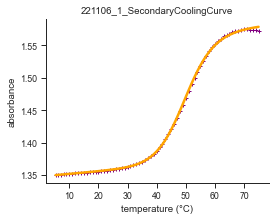

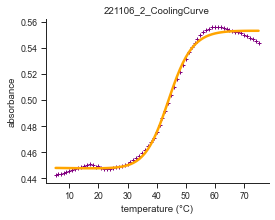

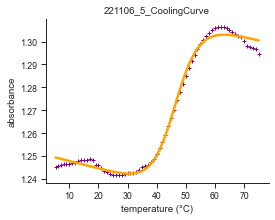

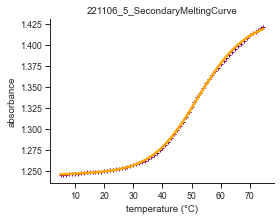

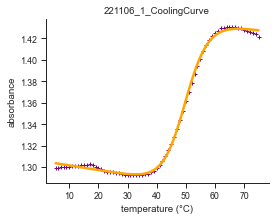

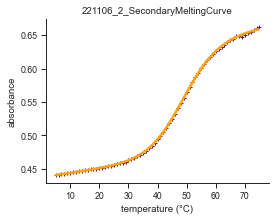

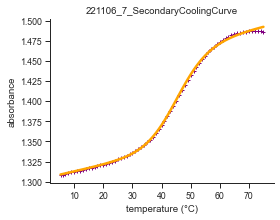

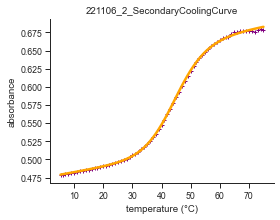

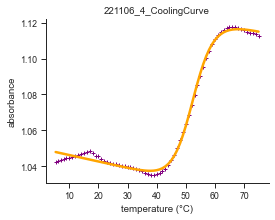

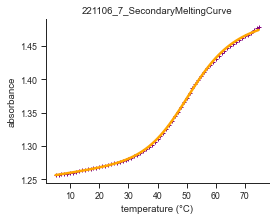

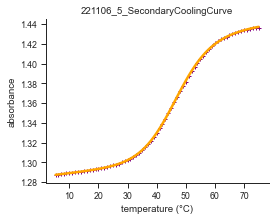

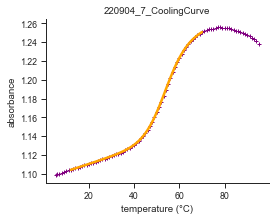

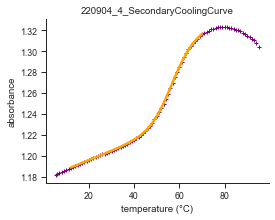

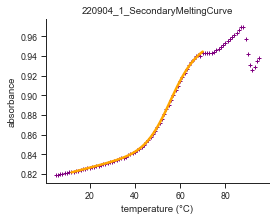

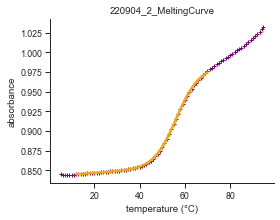

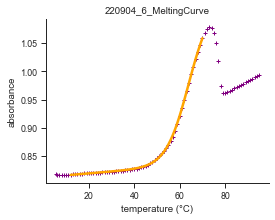

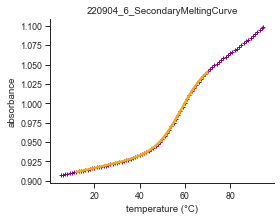

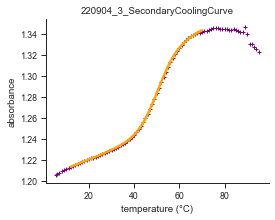

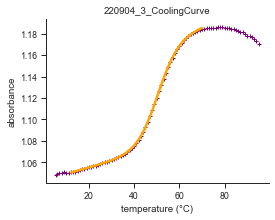

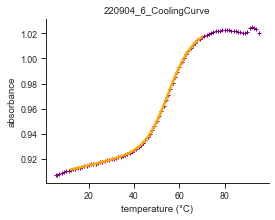

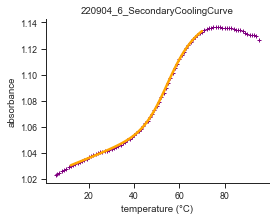

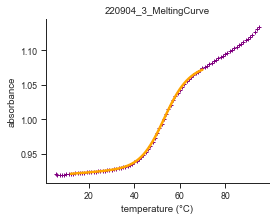

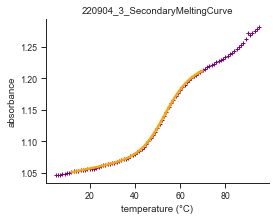

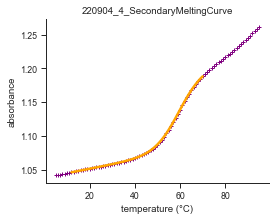

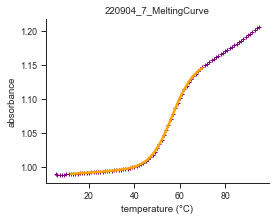

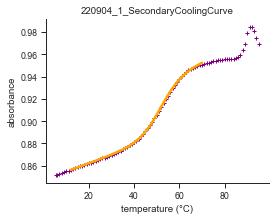

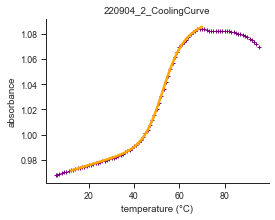

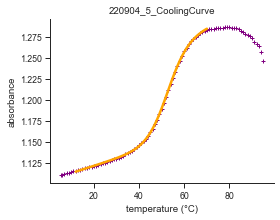

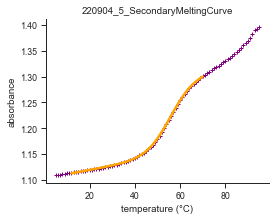

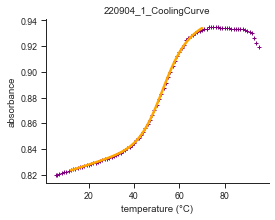

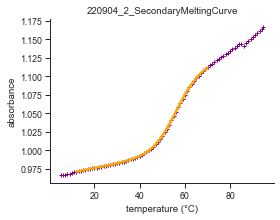

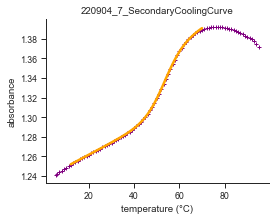

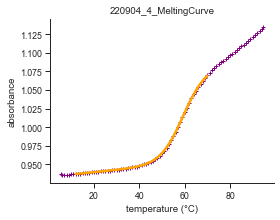

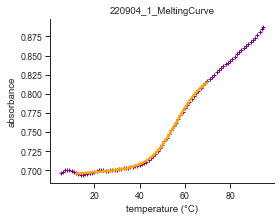

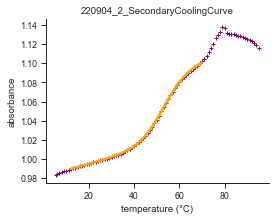

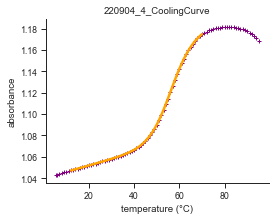

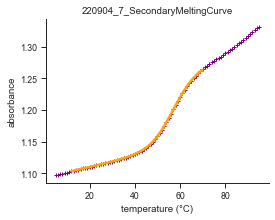

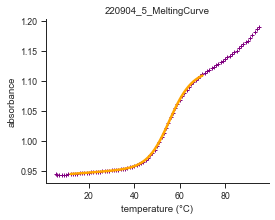

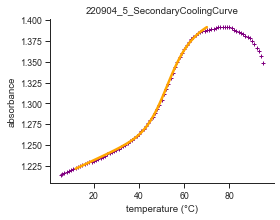

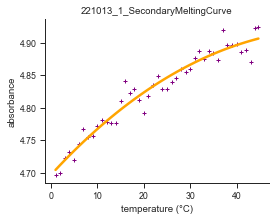

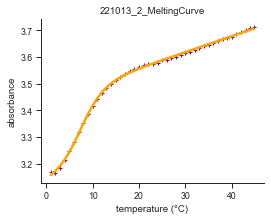

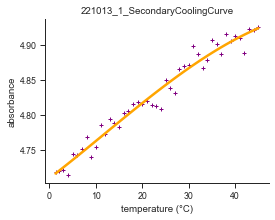

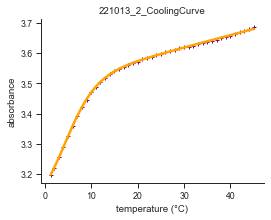

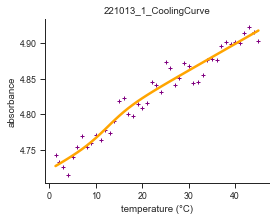

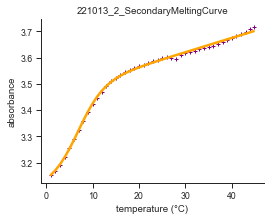

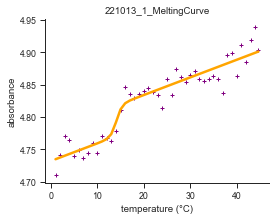

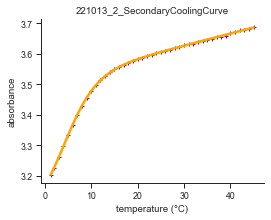

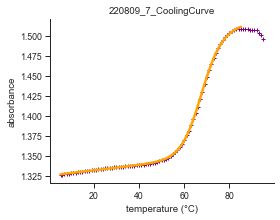

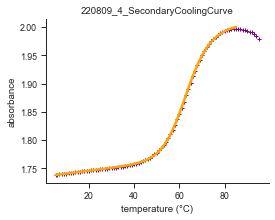

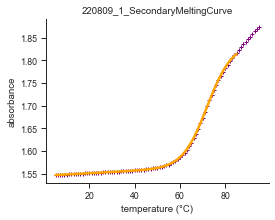

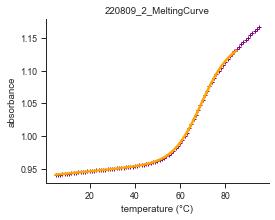

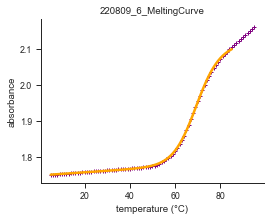

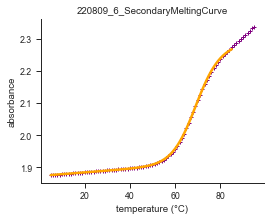

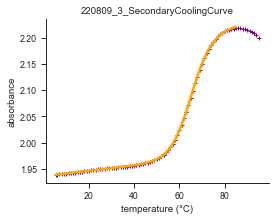

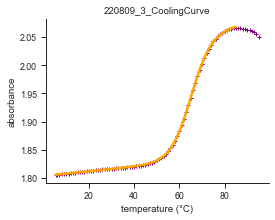

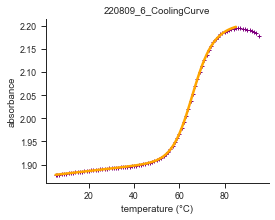

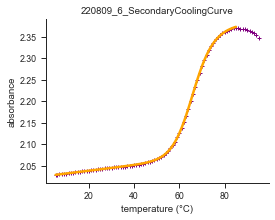

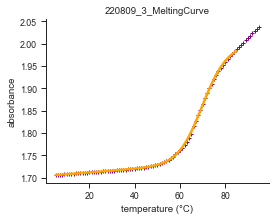

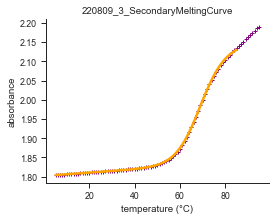

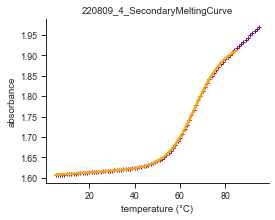

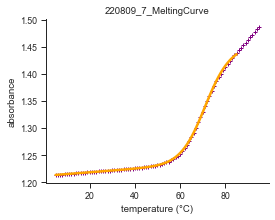

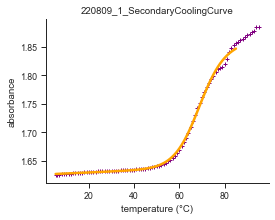

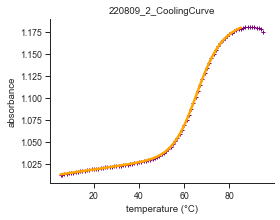

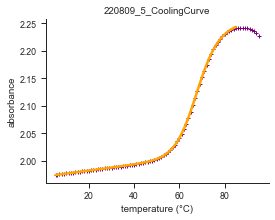

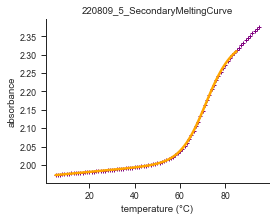

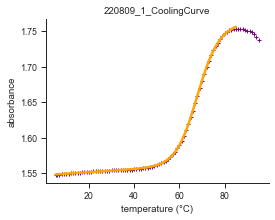

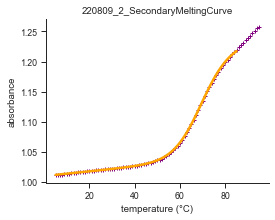

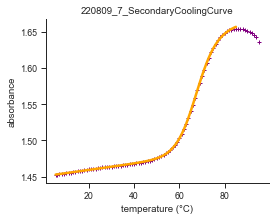

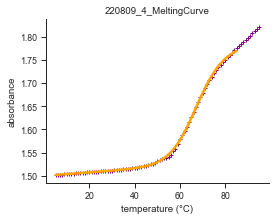

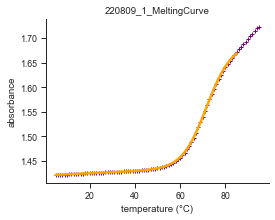

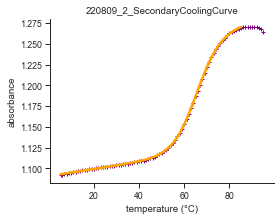

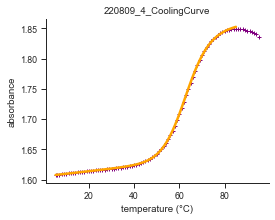

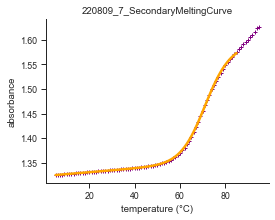

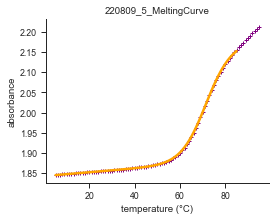

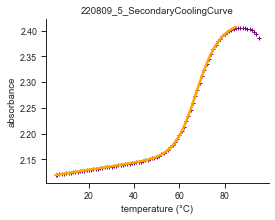

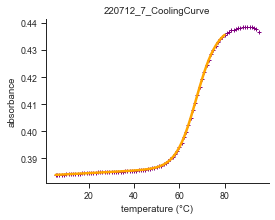

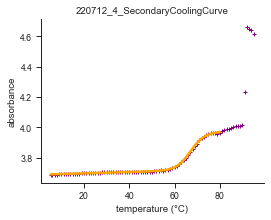

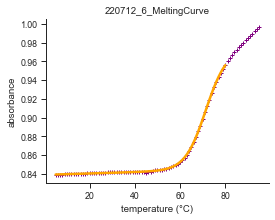

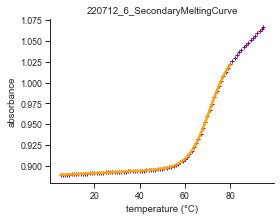

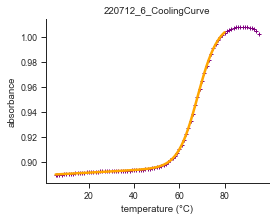

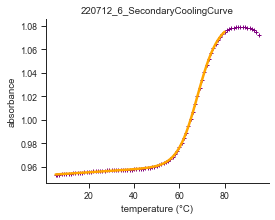

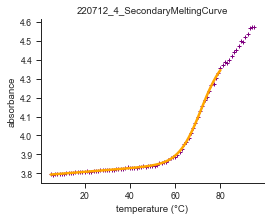

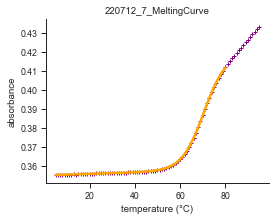

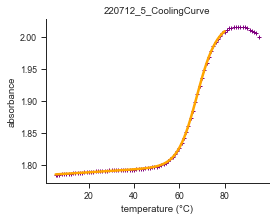

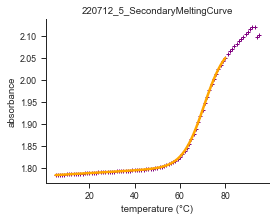

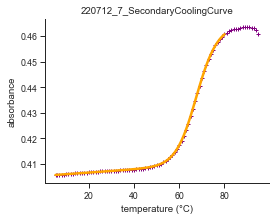

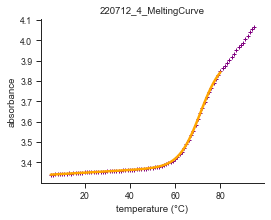

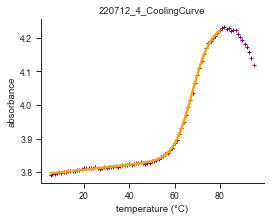

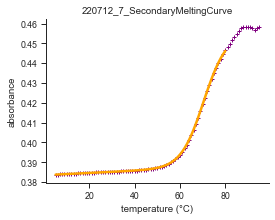

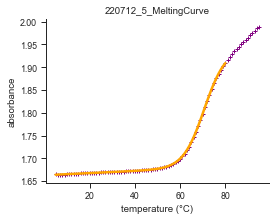

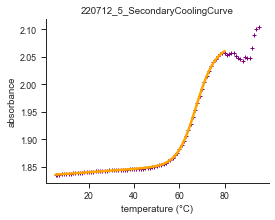

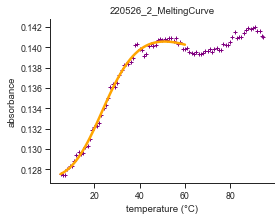

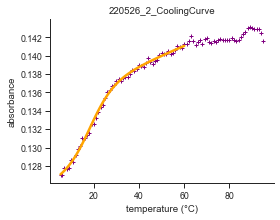

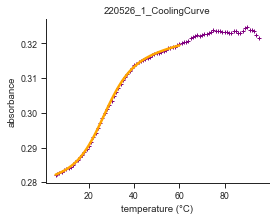

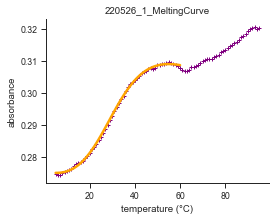

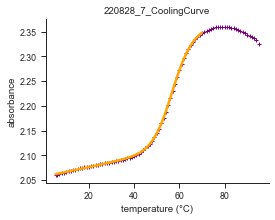

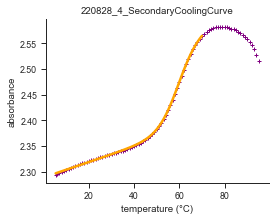

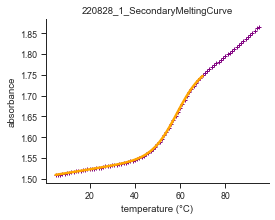

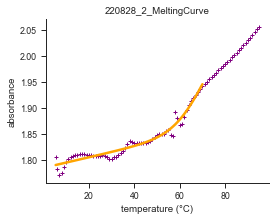

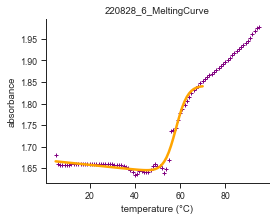

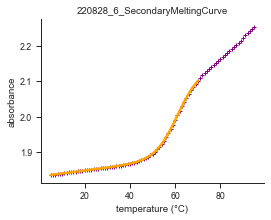

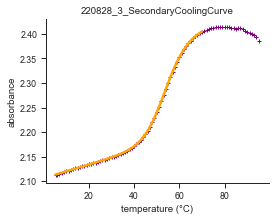

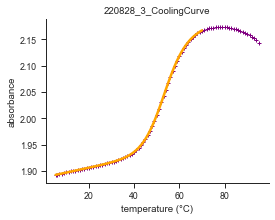

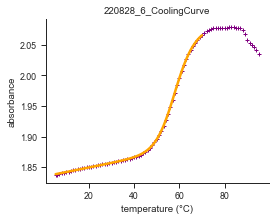

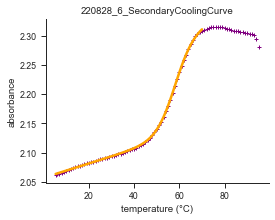

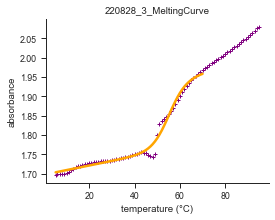

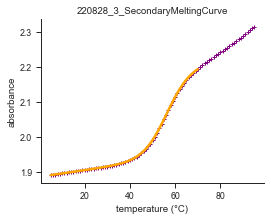

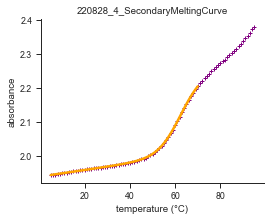

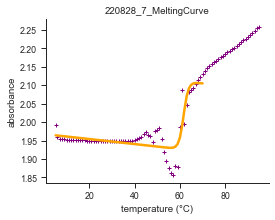

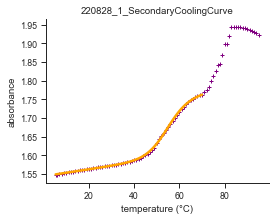

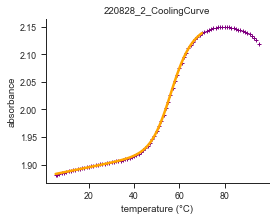

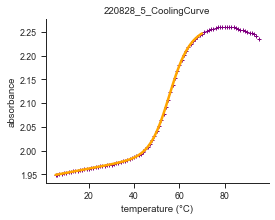

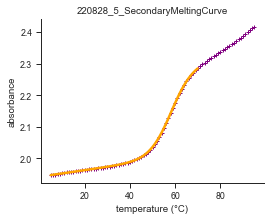

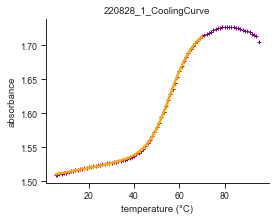

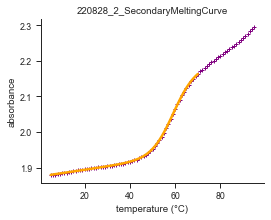

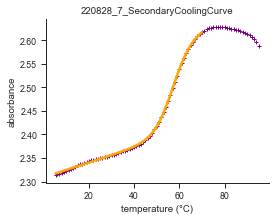

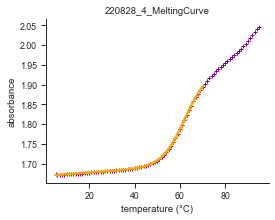

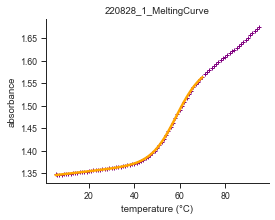

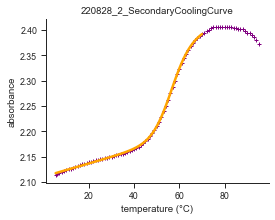

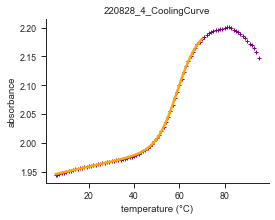

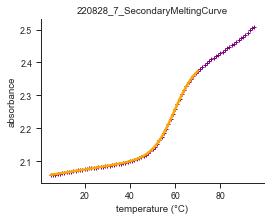

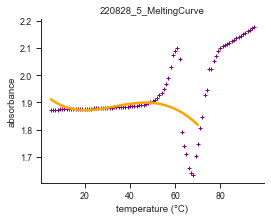

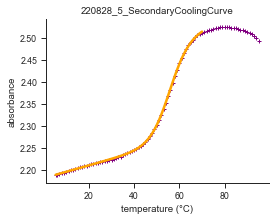

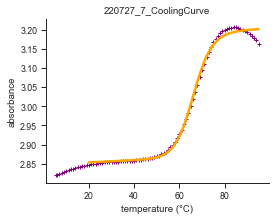

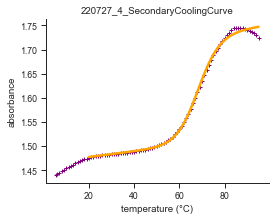

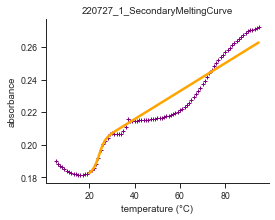

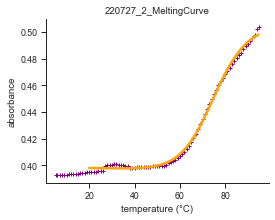

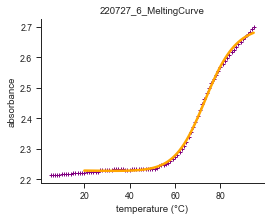

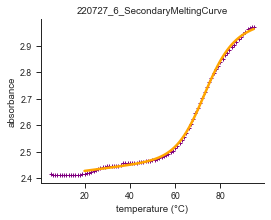

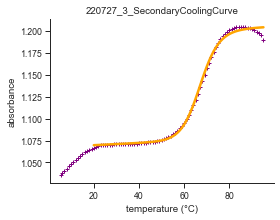

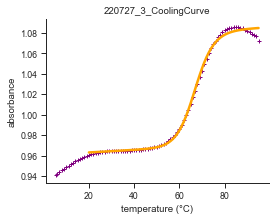

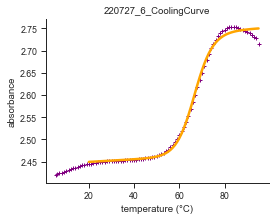

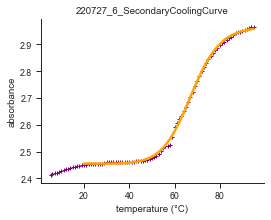

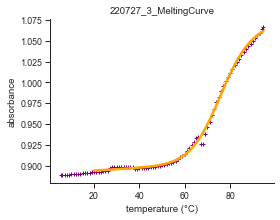

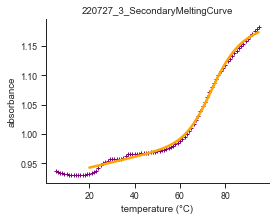

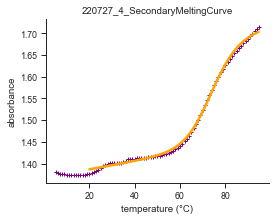

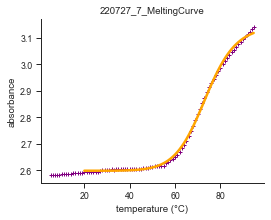

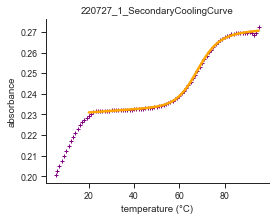

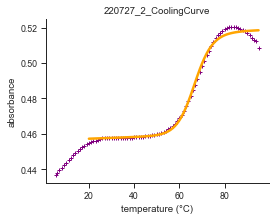

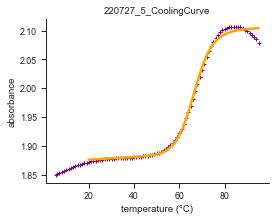

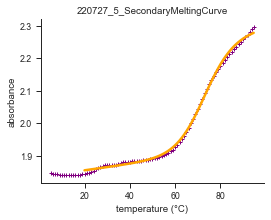

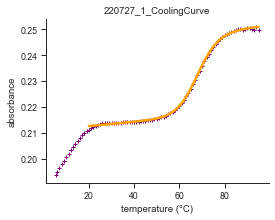

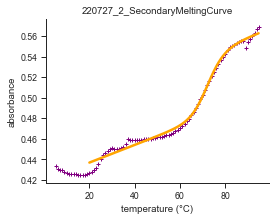

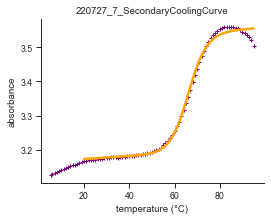

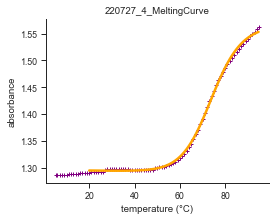

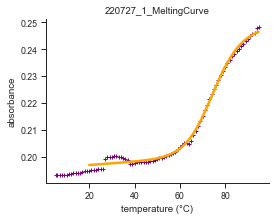

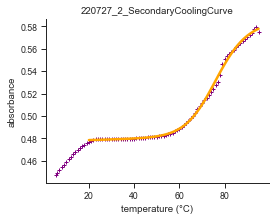

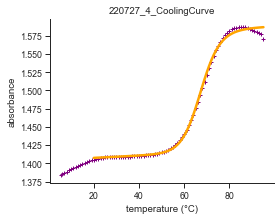

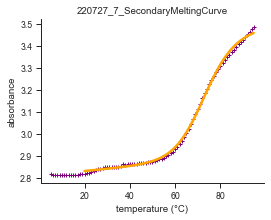

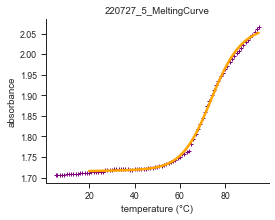

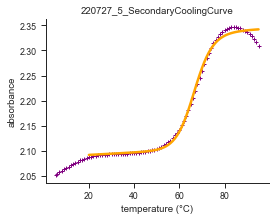

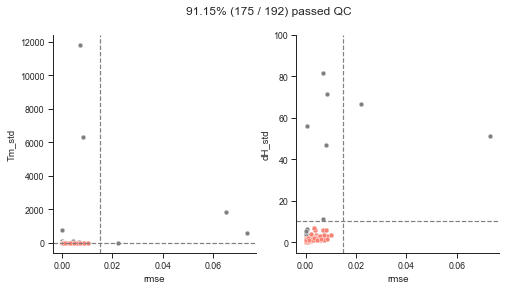

In [245]:
# Run fitting on all curves
result_df = fit_all(datadir="./data/uv_melt/ECLExport", 
                    sample_sheet_file='./data/uv_melt/ECLSampleSheet221109.csv', 
                    result_file='./data/uv_melt/uvmelt_221110.csv')

In [269]:
# Or read from disk
result_df = pd.read_csv('./data/uv_melt/uvmelt_221110.csv', index_col=0).query('pass_qc')

Let's plot the curves that did not pass QC:

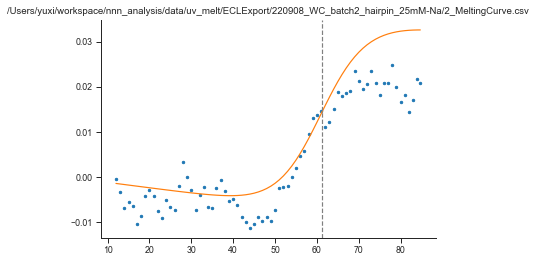

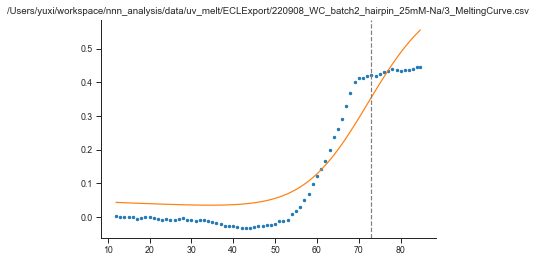

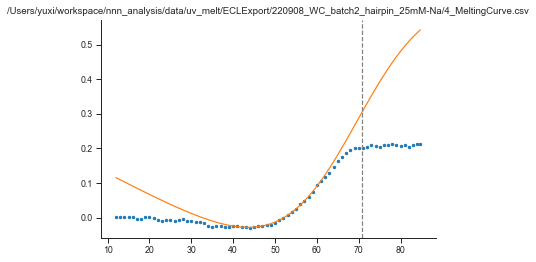

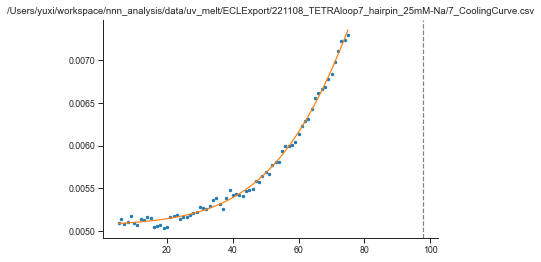

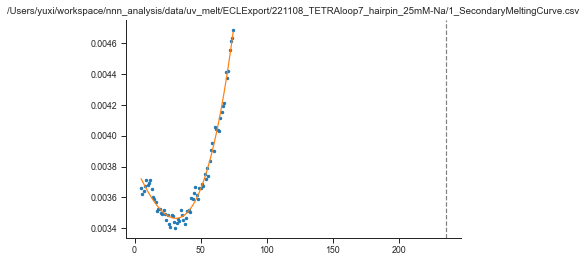

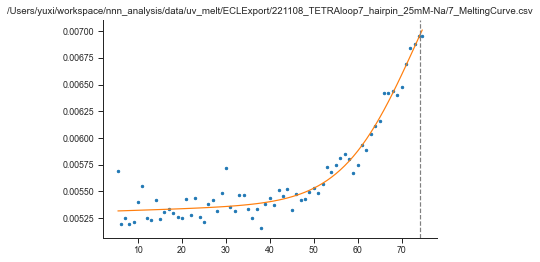

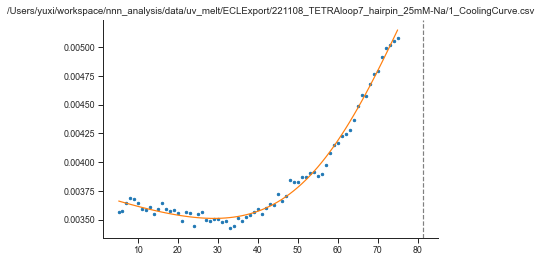

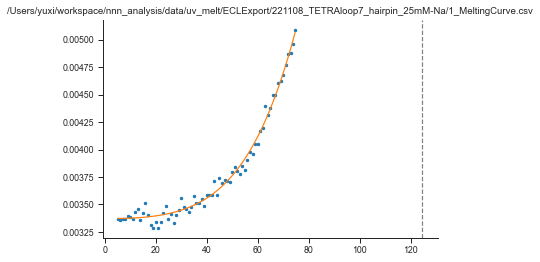

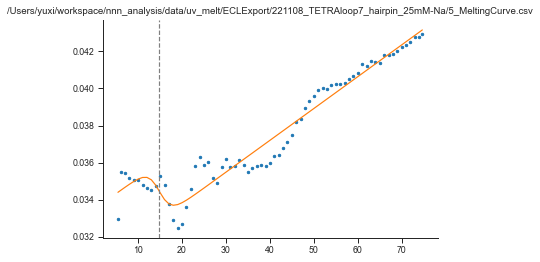

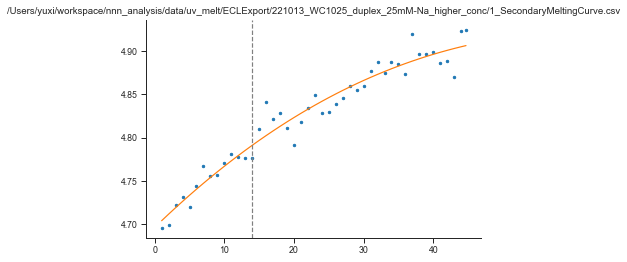

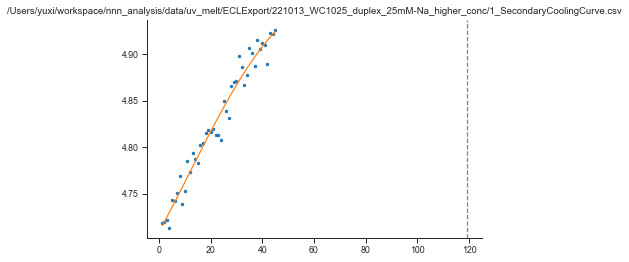

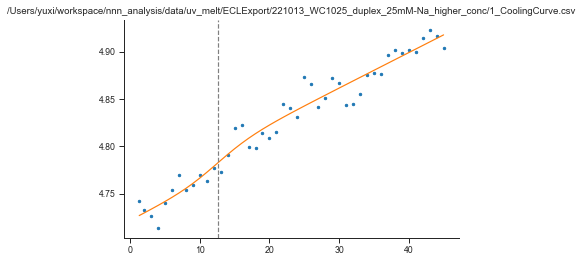

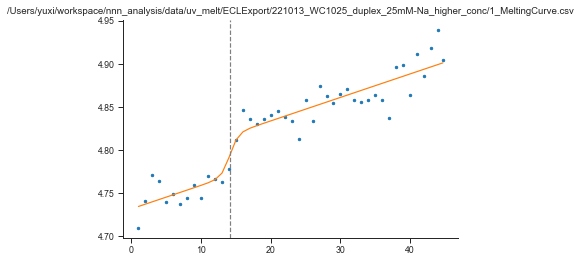

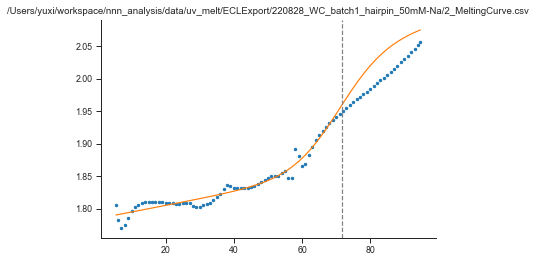

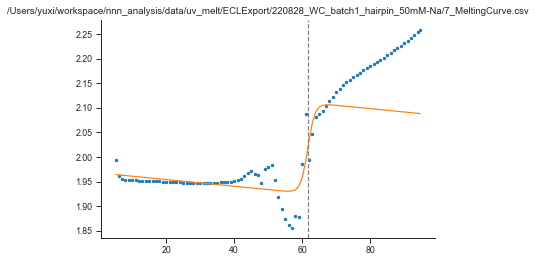

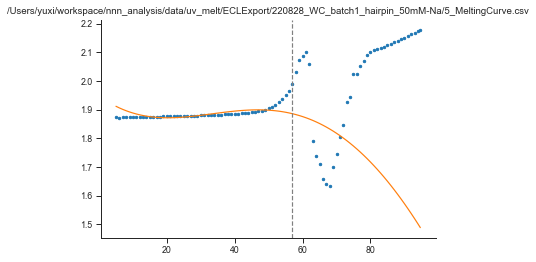

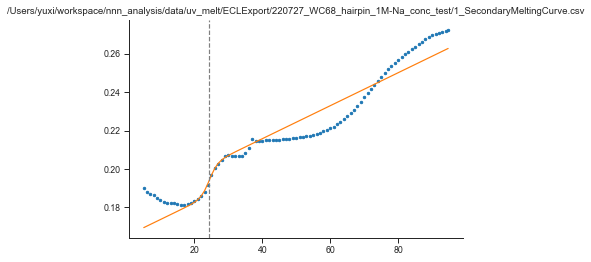

In [146]:
df = result_df.query('~pass_qc')
for i,row in df.iterrows():
    plot_curve_fit_result(row)

Now aggregate the results in the sample (different melt and cooling curves):

In [323]:
result_agg_df = agg_fit_result('./data/uv_melt/uvmelt_221110.csv',
                               './data/uv_melt/uvmelt_agg_221110.csv')

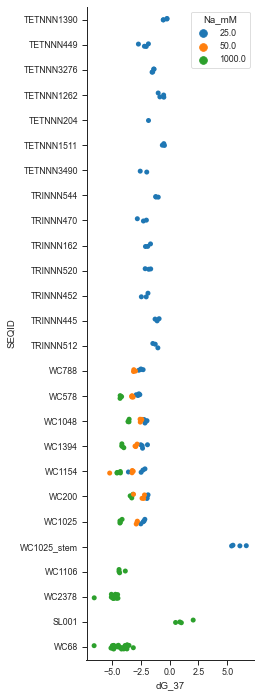

In [319]:
fig, ax = plt.subplots(figsize=(3,12))
sns.stripplot(data=result_df, y='SEQID', x='dG_37',hue='Na_mM')
sns.despine()

In [244]:
arr, data_split_dict = fileio.read_ml_data('./data/models/raw', append_2_arr=True)

In [325]:
df = result_agg_df.merge(arr, how='left', on='SEQID')

In [326]:
df

,SEQID,curve_date,curve_num,dH_uv,dH_uv_std,Tm_uv,Tm_uv_std,dG_37_uv,dG_37_uv_std,dS_uv,...,dG_37_NUPACK,dG_37_ensemble_150mM_NUPACK,dG_37_ensemble_75mM_NUPACK,GC,Tm_NUPACK_salt_corrected,dG_37_NUPACK_salt_corrected,dH_NUPACK_salt_corrected,dS_NUPACK_salt_corrected,scaffold,data_split
0,SL001,220526,1,-28.280069,0.597852,27.349847,0.061516,0.908177,0.859194,-0.094110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SL001,220526,2,-25.820874,1.178439,20.876855,0.181921,1.415904,1.712951,-0.087818,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TETNNN1262,221108,3,-45.741156,0.519243,40.855813,0.030797,-0.561675,0.729840,-0.145670,...,-2.84,-2.334647,-1.969557,50.000000,46.475176,-1.322151,-44.6,-0.134645,GATCGATC_nan,train
3,TETNNN1390,221108,4,-27.685744,0.144754,43.165742,0.015401,-0.539661,0.202731,-0.087526,...,-2.56,-2.261206,-1.955979,43.750000,45.711097,-1.111900,-40.7,-0.122973,GATCGATC_nan,train
4,TETNNN1511,221108,5,-25.638106,1.046451,43.111659,0.119697,-0.495448,1.465707,-0.081066,...,-2.66,-2.231025,-1.881716,43.750000,46.524286,-1.215584,-40.8,-0.122973,GATCGATC_nan,train
5,TETNNN204,221108,1,-16.961557,1.187768,75.955099,2.715161,-1.892665,1.593122,-0.048586,...,-4.13,-3.537790,-3.149170,37.500000,56.693731,-2.615134,-43.8,-0.127906,GATCGATC_nan,train
6,TETNNN3276,221108,6,-34.040209,0.319330,49.914816,0.039597,-1.360789,0.442685,-0.105366,...,-4.97,-4.355866,-3.961020,50.000000,64.977912,-3.632443,-43.9,-0.125520,GATCGATC_nan,train
7,TETNNN3490,221108,7,-20.736550,1.161702,74.119167,1.758441,-2.216504,1.560389,-0.059713,...,-3.30,-2.858544,-2.493750,56.250000,53.836066,-2.054396,-39.9,-0.118007,GATCGATC_nan,train
8,TETNNN449,221108,2,-40.005218,0.185692,53.756904,0.020946,-2.050625,0.255978,-0.122375,...,-2.81,-2.360707,-2.002032,31.250000,46.382920,-1.221563,-41.6,-0.125069,GATCGATC_nan,train
9,TRINNN162,221106,1,-38.636879,0.317323,51.958890,0.035070,-1.777758,0.438577,-0.118843,...,-2.71,-2.607211,-2.266792,53.333333,48.243801,-1.395881,-39.9,-0.119910,GATCGATC_nan,train
